In [1]:
#圖像處理，找邊緣
import cv2

cap = cv2.VideoCapture(1) #開啟攝影機
while (cap.isOpened()):
    ret, frame = cap.read() #讀取影像
    if ret :
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #轉為灰階
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5) #Sobel邊緣檢測
        cv2.imshow('gray', gray) #顯示灰階影像
        cv2.imshow('img', frame)
        cv2.imshow('sobel', sobel) #顯示邊緣影像
        key=cv2.waitKey(1)
        if key ==ord('q'): #按下q鍵離開
            break
        
cap.release()
cv2.destroyAllWindows() #關閉所有視窗

In [16]:
import cv2

img_path = r"source\C1-P1_Train\C\00024.jpg"

img = cv2.imread(img_path) #讀取影像
img = cv2.resize(img, (640, 480)) #調整影像大小
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #轉為灰階

gray = cv2.GaussianBlur(gray, (25, 25), 0) #高斯模糊
# _ , ths = cv2.threshold(src=gray,
#                         thresh=150,
#                         maxval=255,
#                         type=cv2.THRESH_BINARY #二值化影像
#                         )



# canny = cv2.Canny(gray, 100, 200) #Canny邊緣檢測
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5) #Sobel邊緣檢測

# cv2.namedWindow('img', cv2.WINDOW_NORMAL) #建立視窗
# cv2.namedWindow('gray', cv2.WINDOW_NORMAL) #建立視窗
cv2.imshow('img', img) #顯示原始影像
# cv2.imshow('gray', gray) #顯示灰階影像
# cv2.imshow('ths', ths) #顯示灰階影像
# cv2.imshow('canny', canny) #顯示邊緣影像
cv2.imshow('sobel', sobel) #顯示邊緣影像


if cv2.waitKey(0) & 0xFF == ord('q'): #按下q鍵離開
    cv2.destroyAllWindows() #關閉所有視窗
    exit()

In [5]:
#使用 yolo預設模型進行輪廓偵測

from ultralytics import YOLO

model_path = r"model/yolo11n-seg.pt" #模型路徑

img_path = r"source\C1-P1_Train\C\00024.jpg" #影像路徑
model = YOLO(model_path)
results = model.predict(source=img_path,save = True) #預測影像

img = results[0].plot() #繪製預測結果
mask_img = cv2.bitwise_and(img,mask =results[0].masks.xy[0])
cv2.imshow('img', img) #顯示預測結果
cv2.imshow('mask_img', mask_img) #顯示預測結果
cv2.waitKey(0) #等待鍵盤輸入
cv2.destroyAllWindows() #關閉所有視窗


image 1/1 d:\\\\source\C1-P1_Train\C\00024.jpg: 480x640 4 apples, 19.4ms
Speed: 3.3ms preprocess, 19.4ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict5


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - bitwise_and() missing required argument 'src2' (pos 2)
>  - bitwise_and() missing required argument 'src2' (pos 2)


In [4]:
#測試

from ultralytics import YOLO
import cv2
import module.processImage as Pi
# 載入 segmentation 模型（官方可用: yolov8n-seg.pt, yolov8s-seg.pt, ...）
model = YOLO(r'Mango_training\train_yolo11-seg\weights\best.pt')
import numpy as np

# 載入圖片
img_path = r'source\C1-P1_Test\C\00079.jpg'
# img_path = r'img-1515398565-99051.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (640, 480))  # 調整大小
# 執行偵測
results = model.predict(img)[0]

pi1 = Pi.processImage(results)


binary_mask =pi1.binary_mask
color_mask = pi1.get_color_mask()
blended = pi1.get_remove_bg_img()
contours = pi1.get_draw_contours()
area = pi1.get_area()
# print("area:", area)
cv2.imshow("Mask", binary_mask)
# cv2.imshow("color_mask", color_mask)
cv2.imshow("blended", blended)
# cv2.imshow("Contours", contours)
# cv2.imshow("img", np.ones_like(img) * 255)
cv2.waitKey(0)



0: 480x640 1 mango, 23.2ms
Speed: 2.7ms preprocess, 23.2ms inference, 6.6ms postprocess per image at shape (1, 3, 480, 640)


-1

In [4]:
from ultralytics import YOLO
import cv2
import module.processImage as Pi
# 載入 segmentation 模型（官方可用: yolov8n-seg.pt, yolov8s-seg.pt, ...）
model = YOLO(r'Mango_training\train_yolo11-seg\weights\best.pt')

# 載入圖片
img_path = r'source\C1-P1_Test\C\00079.jpg'
# img_path = r'img-1515398565-99051.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (640, 480))  # 調整大小
# 執行偵測
results = model.predict(img)[0]

pi1 = Pi.processImage(results)

nonBg_img = pi1.get_remove_bg_img()
gray = cv2.cvtColor(nonBg_img, cv2.COLOR_BGR2GRAY) #轉為灰階

sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5) #Sobel邊緣檢測

cv2.imshow('img', nonBg_img) #顯示原始影像
cv2.imshow('gray', gray) #顯示原始影像
cv2.imshow('sobel', sobel) #顯示原始影像



cv2.waitKey(0) #等待鍵盤輸入
cv2.destroyAllWindows() #關閉所有視窗


0: 480x640 1 mango, 26.4ms
Speed: 4.5ms preprocess, 26.4ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
#依照官方文件範例
# https://docs.ultralytics.com/modes/predict/#segmentation-predict
import torch
from ultralytics.engine.results import Masks
masks = torch.rand(10, 160, 160)  # 10 masks of 160x160 resolution
orig_shape = (720, 1280)  # Original image shape
mask_obj = Masks(masks, orig_shape)

cv2.imshow('orig_shape', orig_shape)
# cv2.imshow('Masks', masks)
print(mask_obj)  # Print the Masks object
cv2.waitKey(0)
cv2.destroyAllWindows()

img_path: source\C1-P1_Train\A\00030.jpg

0: 480x640 1 mango, 36.8ms
Speed: 2.7ms preprocess, 36.8ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict19
img_path: source\C1-P1_Train\A\00036.jpg

0: 480x640 1 mango, 35.5ms
Speed: 2.9ms preprocess, 35.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict19
img_path: source\C1-P1_Train\A\00045.jpg

0: 480x640 1 mango, 29.0ms
Speed: 2.8ms preprocess, 29.0ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict19
img_path: source\C1-P1_Train\A\00058.jpg

0: 480x640 1 mango, 28.9ms
Speed: 2.6ms preprocess, 28.9ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict19
img_path: source\C1-P1_Train\A\00061.jpg

0: 480x640 1 mango, 29.0ms
Speed: 2.6ms preprocess, 29.0ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
Results sa

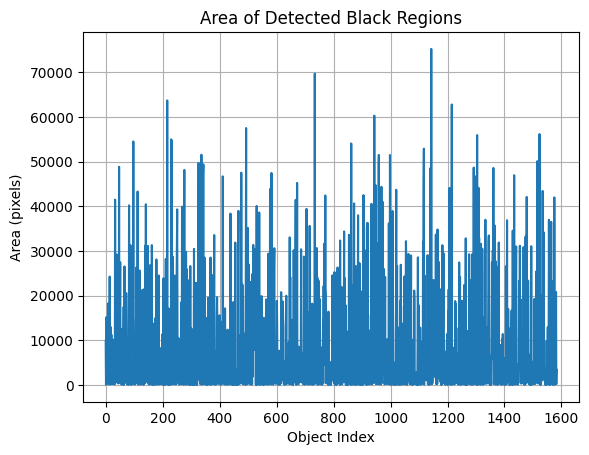

In [7]:
#黑點分佈
import matplotlib.pyplot as plt
from ultralytics import YOLO
import module.processImage as pI
import cv2
import os
import torch
torch.cuda.empty_cache()  # 清除 GPU 記憶體
model = YOLO(r'Mango_training\train_yolo11-seg\weights\best.pt')
# folder_path = r'source\C1-P1_Test\A'
folder_path = r'source\C1-P1_Train\A'

imgs_path = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        imgs_path.append(file_path)
# img_path=r'source\C1-P1_Test\C\00079.jpg'
# imgs = cv2.imread(imgs_path)
# imgs = cv2.resize(imgs, (640, 480))  # 調整大小
areas = {}  # 儲存每張圖片的面積

for i in range(len(imgs_path)):
    img = cv2.imread(imgs_path[i])  # 讀取影像
    img = cv2.resize(img, (640, 480))  # 調整大小
    print(f"img_path: {imgs_path[i]}")
    results = model.predict(source=img,imgsz=640, save=True,save_crop=True)[0]  # 預測影像
    pi = pI.processImage(results)  # 建立 processImage 物件
    areas[i] = pi.get_threshold_area()  # 儲存面積
    # del pi  # 釋放物件



print(f"count :{len(areas)}\nareas:{areas}")
# plt.figure(figsize=(10, 10))  # 設定圖形大小
# plt.bar(len(areas),areas,color='blue')
plt.plot(areas.keys(), areas.values())
plt.xlabel("Object Index")
plt.ylabel("Area (pixels)")
plt.title("Area of Detected Black Regions")
plt.grid(True)
plt.show()